In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import glob

from matplotlib.ticker import MaxNLocator

In [8]:
df_all = pd.DataFrame()
for path in glob.glob("ACCRE/*.csv"):
    dataset = path.split("/")[1]
    dataset = dataset[:-4]
    df_temp = pd.read_csv("ACCRE/"+dataset+".csv") 
    df_temp["Application"] = [dataset for i in range(len(df_temp))]
    df_all = df_all.append(df_temp)

In [9]:
df_all.head()

,Application,Bins,Cost,Function,Parameters,Trainset,Unnamed: 0
0,fMRIQA_v3,NaN,675.389586,Discreet,NaN,NaN,0
1,fMRIQA_v3,NaN,521.150916,Optimal,NaN,NaN,1
2,fMRIQA_v3,NaN,540.892749,Polynomial,1.0,NaN,2
3,fMRIQA_v3,NaN,556.786695,Polynomial,2.0,NaN,3
4,fMRIQA_v3,NaN,680.776979,Polynomial,3.0,NaN,4


In [10]:
apps = df_all["Application"].unique()
print(len(apps))
apps

76


array(['fMRIQA_v3', 'AbOrganSeg_Localized_v1', 'AbOrganSeg_Whole_v1',
       'Bedpost_v1', 'Cerebellum_Segmentation_v1', 'DOT_v1',
       'dtiQA_Amico_Multi_v1', 'dtiQA_v2', 'dtiQA_v3', 'dtiQA_v4',
       'fMRI_Connectivity_PreProcess_Scan_v1_global_scrub',
       'fMRI_Connectivity_PreProcess_Scan_v1',
       'fMRI_Connectivity_PreProcess_Scan_v2_alff',
       'fMRI_Connectivity_PreProcess_Scan_v2',
       'fMRI_Connectivity_Process_Scan_v1_global_scrub',
       'fMRI_Connectivity_Process_Scan_v1',
       'fMRI_Connectivity_Process_Scan_v2',
       'fMRI_Connectivity_Process_Scan_v3_ma132',
       'fMRI_Connectivity_Process_Scan_v3', 'fMRIQA', 'fMRIQA_v2',
       'FSL_First', 'Generic_FMRI_v1', 'MaCRUISE_v0', 'MaCRUISE_v1',
       'MaCRUISE_v2', 'MAGM_Normalize_v1', 'MGC_Multi_Atlas_Seg_v1',
       'Multi_Atlas', 'Multi_Atlas_v2', 'NDW_VBM_v1',
       'ON_CT_segmentation_v2', 'ON_CT_segmentation_v3',
       'ON_MR_segmentation_v2', 'ON_MR_segmentation_vDEV1',
       'ON_MR_sheath_segm

In [11]:
df_best = pd.DataFrame(columns=["Application", "Function", "Cost"])
for dataset in apps:
    cost_discreet = df_all[(df_all.Function=="Discreet") &
                           (df_all.Application == dataset)]["Cost"].values[0]
    cost_optimal = df_all[(df_all.Function=="Optimal")
                          & (df_all.Application == dataset)]["Cost"].values[0]
    df_best.loc[len(df_best)] = [dataset, "Discreet", (cost_discreet-cost_optimal)/cost_optimal]

    cost = min(df_all[(df_all.Function!="Optimal") & (df_all.Application == dataset) &
                      (df_all.Function!="Discreet")]["Cost"].values)
    df_best.loc[len(df_best)] = [dataset, "Continuous", (cost-cost_optimal)/cost_optimal]

df_best.head()

,Application,Function,Cost
0,fMRIQA_v3,Discreet,0.295958
1,fMRIQA_v3,Continuous,0.037881
2,AbOrganSeg_Localized_v1,Discreet,0.034680
3,AbOrganSeg_Localized_v1,Continuous,0.004326
4,AbOrganSeg_Whole_v1,Discreet,0.106982


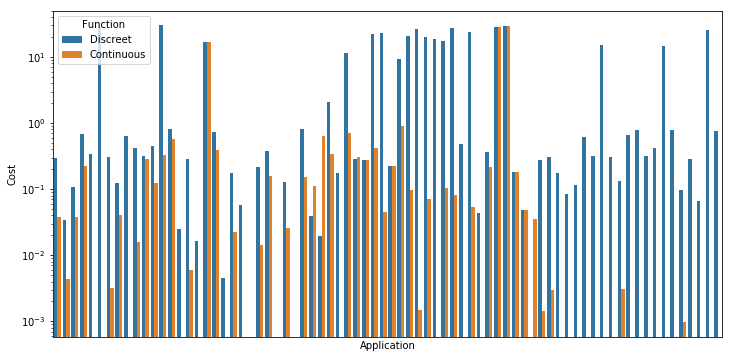

In [13]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x="Application", y="Cost", hue="Function", data=df_best)
ax.set_xticks([])
ax.set(yscale="log")
plt.savefig("figures_ACCRE/relative_cost.png")

In [ ]:
dataset = apps[9]
df = df_all[df_all.Application == dataset]
data = pd.Series(np.loadtxt("ACCRE/"+dataset+".out", delimiter=' '))
print(dataset, len(data))

In [ ]:
df

In [ ]:
# plot the cost for different polynomial orders
plt.figure(figsize=(12,8))
ax = sns.lineplot(x="Parameters", y="Cost",
                  data=df[df.Function=="Polynomial"])
cost_discreet = df[df.Function=="Discreet"]["Cost"].values[0]
cost_optimal = df[df.Function=="Optimal"]["Cost"].values[0]
ax.axhline(cost_discreet, ls='--')
ax.axhline(cost_optimal, ls='--')
ax.set_xlabel('Degree of the polynomial')
ax.set_ylabel('Cost')
plt.savefig("figure_ACCRE/polynomial/%s_poly.png" %(dataset))

In [ ]:
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5)
#plt.plot(x, func(x, *popt), 'g--')
ax.set_xlabel('Walltime')
ax.set_ylabel('Frequency')

plt.figure(figsize=(12,8))
ax = data[:int(len(data)/100)].plot(kind='hist', bins=50, normed=True, alpha=0.5)
#plt.plot(x, func(x, *popt), 'g--')
ax.set_xlabel('Walltime')
ax.set_ylabel('Frequency')

In [ ]:
df_cost = df.groupby('Function').min()
df_cost["Function"] = df_cost.index
df_cost

In [ ]:
# Keep the best fit for bot Function and Distribution fitting
df_best = pd.DataFrame(columns=["Function", "Cost"])
df_best.loc[len(df_best)] = ["Discreet", df_cost[df_cost.Function=="Discreet"]["Cost"].values[0]]
df_best.loc[len(df_best)] = ["Optimal", df_cost[df_cost.Function=="Optimal"]["Cost"].values[0]]

# Best distribution fit
name = df_cost[(df_cost.Function!="Optimal") & (df_cost.Function!="Discreet") &
               (df_cost.Function!="Exponential") & (df_cost.Function!="Polynomial")]["Function"].values[0]
df_best.loc[len(df_best)] = ["Distribution (%s)" %(name), df_cost[df_cost.Function=="Optimal"]["Cost"].values[0]]

# Best funtion fit
cost = df_cost[df_cost.Function=="Exponential"]["Cost"].values[0]
name = "Function (exponential)"
if cost > df_cost[df_cost.Function=="Polynomial"]["Cost"].values[0]:
    cost = df_cost[df_cost.Function=="Polynomial"]["Cost"].values[0]
    order = df_cost[df_cost.Function=="Polynomial"]["Parameters"].values[0]
    name = "Function (polynomial %d)" %(int(order))

df_best.loc[len(df_best)] = [name, cost]
df_best

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x="Function", y="Cost", data=df_best[df_best.Function != "Optimal"],
                 palette="Blues_d")
ax.axhline(cost_optimal, ls='--', color="black")